In [28]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
data = pd.read_csv("car_data.csv")

data.head(20)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [32]:
data = data.drop('User ID', axis=1)
data = data.drop('Gender', axis=1)

In [34]:
X = data[['Age', 'AnnualSalary']]
y = data['Purchased']  

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
scaler = StandardScaler()       # wait 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85

Confusion Matrix:
[[116   9]
 [ 20  55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       125
           1       0.86      0.73      0.79        75

    accuracy                           0.85       200
   macro avg       0.86      0.83      0.84       200
weighted avg       0.86      0.85      0.85       200



In [62]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [66]:
y_test.values

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [44]:
y_pred_proba = model.predict_proba(X_test_scaled)

y_pred_proba[0:5]

array([[0.98536462, 0.01463538],
       [0.87545538, 0.12454462],
       [0.73450448, 0.26549552],
       [0.71163516, 0.28836484],
       [0.84832987, 0.15167013]])

In [46]:
from sklearn.metrics import log_loss

loss_sckit = log_loss(y_test, y_pred_proba)

loss_sckit

0.3572352667644411

In [48]:
from keras.utils import to_categorical

y_test_cat = to_categorical(y_test)

In [70]:
y_test[0:5]

992    0
69     0
691    0
279    1
16     0
Name: Purchased, dtype: int64

In [78]:
y_test_cat[0:5]   # one hot encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [76]:
loss = (-y_test_cat * np.log(y_pred_proba) - (1 - y_test_cat) * np.log(1 - y_pred_proba)).mean()

loss   # log loss 

0.3572352667644411

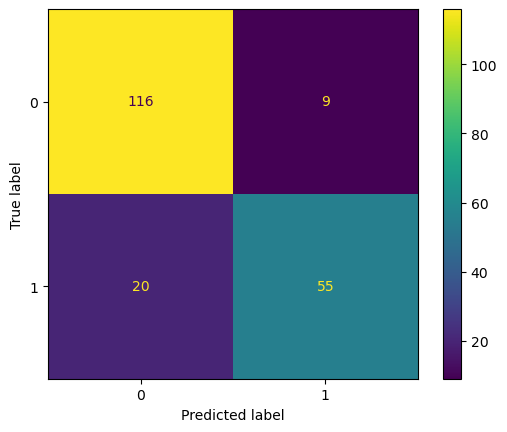

In [60]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# First compute the confusion matrix
confusion_matrix_result = metrics.confusion_matrix(y_test, y_pred)

# Then create the display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result,
                                          display_labels=[0, 1])

cm_display.plot()
plt.show()